In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#task1- import 3 datasets

In [5]:
movies=pd.read_csv('movies.dat',sep='::',names=['Movie_ID','Title','Genres'],engine='python')
movies.head()

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings=pd.read_csv('ratings.dat',sep='::',names=['User_ID','Movie_ID','Rating','Timestamp'],engine='python')
ratings.head()

,User_ID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users=pd.read_csv('users.dat',sep='::',names=['User_ID','Gender','Age','Occupation','Zip_code'],engine='python')
users.head()

,User_ID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# task2- Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [9]:
movie_rating=movies.merge(ratings)
movie_rating.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
master_data=movie_rating.merge(users)
master_data.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [9]:
# task3- Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

In [10]:
## User Age Distribution

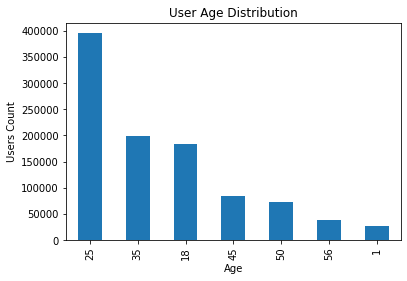

In [15]:
master_data.Age.value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Users Count')
plt.title('User Age Distribution')
plt.show()

In [13]:
## User rating of the movie “Toy Story”

In [27]:
toy_story_rating=master_data.loc[master_data['Title'].str.contains('Toy Story')==True]
toy_story_rating

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [42]:
toy_story_rating.groupby(['Title','Rating']).size().unstack()

Rating,1,2,3,4,5
Title,,,,,
Toy Story (1995),16,61,345,835,820
Toy Story 2 (1999),25,44,214,578,724


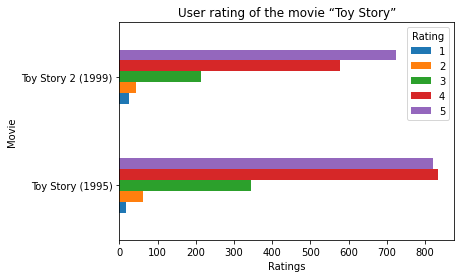

In [44]:
toy_story_rating.groupby(['Title','Rating']).size().unstack().plot(kind='barh')
plt.xlabel('Ratings')
plt.ylabel('Movie')
plt.title('User rating of the movie “Toy Story”')
plt.show()

In [45]:
## Top 25 movies by viewership rating

In [59]:
top_25_movies=master_data.groupby('Title').size().sort_values(ascending= False)[0:26]
top_25_movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

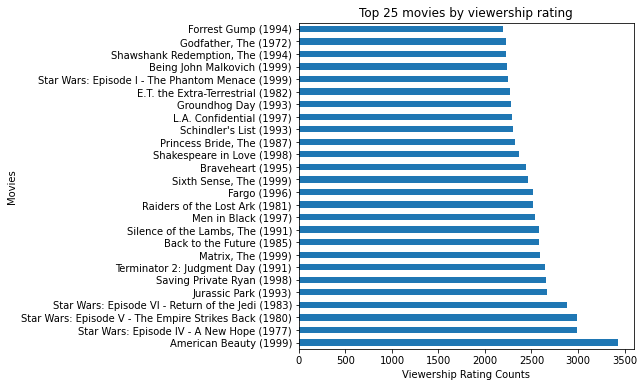

In [61]:
top_25_movies.plot.barh(figsize=(6,6))
plt.xlabel('Viewership Rating Counts')
plt.ylabel('Movies')
plt.title('Top 25 movies by viewership rating')
plt.show()

In [62]:
## Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [63]:
user_2696=master_data[master_data.User_ID == 2696]
user_2696

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [91]:
# task4 - Feature Engineering:

In [ ]:
## Find out all the unique genres 

In [92]:
master_data.Genres

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Genres, Length: 1000209, dtype: object

In [98]:
uni_gen=master_data.Genres.str.split('|').str.get(0)
uni_gen

0          Animation
1          Animation
2              Drama
3             Action
4              Drama
             ...    
1000204        Drama
1000205       Comedy
1000206       Comedy
1000207       Action
1000208       Action
Name: Genres, Length: 1000209, dtype: object

In [99]:
uni_gen = uni_gen.unique()
uni_gen

array(['Animation', 'Drama', 'Action', "Children's", 'Crime', 'Musical',
       'Adventure', 'Comedy', 'Romance', 'Thriller', 'Western',
       'Documentary', 'Sci-Fi', 'Horror', 'Film-Noir', 'Mystery', 'War',
       'Fantasy'], dtype=object)

In [110]:
for i in uni_gen:
    print(i)

Animation
Drama
Action
Children's
Crime
Musical
Adventure
Comedy
Romance
Thriller
Western
Documentary
Sci-Fi
Horror
Film-Noir
Mystery
War
Fantasy


In [ ]:
## Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [12]:
one_hot_encoding=master_data.Genres.str.get_dummies()
one_hot_encoding

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
master_data_2=pd.concat([master_data,one_hot_encoding],axis=1)
master_data_2.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
## Determine the features affecting the ratings of any particular movie.

In [113]:
master_data_2.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [114]:
master_data_2.Gender=master_data_2.Gender.str.replace('F','1')
master_data_2.Gender=master_data_2.Gender.str.replace('M','0')
master_data_2.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


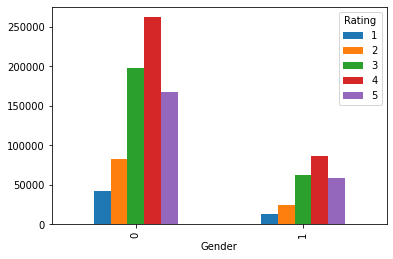

In [120]:
master_data_2.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

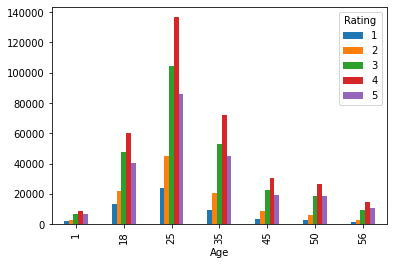

In [14]:
master_data_2.groupby(['Age','Rating']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

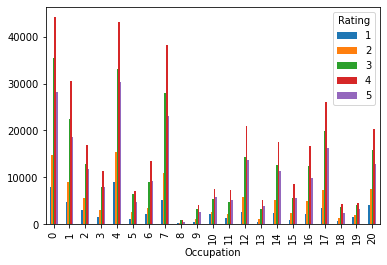

In [15]:
master_data_2.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

In [16]:
## Developing an appropriate model to predict the movie ratings

In [17]:
master_data_2.head()

,Movie_ID,Title,Genres,User_ID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [19]:
x=master_data_2 [['Age','Occupation','Movie_ID']].values
x

array([[   1,   10,    1],
       [   1,   10,   48],
       [   1,   10,  150],
       ...,
       [  25,    4, 3536],
       [  25,    4, 3555],
       [  25,    4, 3578]])

In [23]:
y=master_data_2 [['Rating']].values
y

array([[5],
       [5],
       [5],
       ...,
       [5],
       [3],
       [5]])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=23)

In [31]:
## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(n_estimators=3,criterion='entropy')
r_forest.fit(x_train,y_train)
y_pred1=r_forest.predict(x_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
from sklearn.metrics import accuracy_score
r_forest_acc=accuracy_score(y_test ,y_pred1 )*100

In [35]:
## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg_model=LogisticRegression()
log_reg_model.fit(x_train,y_train )
y_pred2=log_reg_model.predict(x_test)
log_reg_model_acc=accuracy_score(y_test,y_pred2)*100

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
## K-Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier 
k=8
knn=KNeighborsClassifier(n_neighbors= k)
knn.fit(x_train ,y_train )
y_pred3=knn.predict(x_test)
knn_acc=accuracy_score(y_test , y_pred3 )*100

/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
## Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred4=nb.predict(x_test)
nb_acc=accuracy_score(y_test,y_pred4)*100

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [48]:
## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy')
d_tree.fit(x_train,y_train)
y_pred5=d_tree.predict(x_test)
d_tree_acc=accuracy_score(y_test,y_pred5)*100

In [52]:
models=pd.DataFrame({'Model': ['Random Forest','Logistic Regression','KNeighbors','Naive Bayes','Decision Tree'],
                     'Score':[r_forest_acc, log_reg_model_acc ,knn_acc ,nb_acc ,d_tree_acc]})

In [53]:
models.sort_values(by='Score',ascending= False)

,Model,Score
3,Naive Bayes,34.917548
1,Logistic Regression,34.889069
4,Decision Tree,34.700320
0,Random Forest,34.557320
2,KNeighbors,34.475216
